# MFCC extraction
### Dowload data set: http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

In [3]:
from os import listdir
from os.path import isdir, join
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [4]:
# Dataset path
dataset_path = 'data_speech_commands/' 

# Create and view all possible targets
targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(targets)
print('alltargets: ',len(targets))

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']
alltargets:  36


In [5]:
# Only keep some specified words
words = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
         'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
targets = [a for a in words for b in targets if a == b]
print(targets)
print('targets selected: ',len(targets))

['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
targets selected:  20


In [6]:
# See how many samples are in each
num_samples = 0
for target in targets:
    print(target,', ',len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

zero ,  4052
one ,  3890
two ,  3880
three ,  3727
four ,  3728
five ,  4052
six ,  3860
seven ,  3998
eight ,  3787
nine ,  3934
yes ,  4044
no ,  3941
up ,  3723
down ,  3917
left ,  3801
right ,  3778
on ,  3845
off ,  3745
stop ,  3872
go ,  3880
Total samples: 77454


In [7]:
# Settings
target_list = targets
feature_sets_file = 'mfcc_sets_BD2.npz'
win_len = 0.02
win_step = 0.01
num_mfcc = 20
len_mfcc = 99 # 10 ms samples

In [8]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)
    print(target,' => label: ', index)

data_speech_commands/zero
zero  => label:  0
data_speech_commands/one
one  => label:  1
data_speech_commands/two
two  => label:  2
data_speech_commands/three
three  => label:  3
data_speech_commands/four
four  => label:  4
data_speech_commands/five
five  => label:  5
data_speech_commands/six
six  => label:  6
data_speech_commands/seven
seven  => label:  7
data_speech_commands/eight
eight  => label:  8
data_speech_commands/nine
nine  => label:  9
data_speech_commands/yes
yes  => label:  10
data_speech_commands/no
no  => label:  11
data_speech_commands/up
up  => label:  12
data_speech_commands/down
down  => label:  13
data_speech_commands/left
left  => label:  14
data_speech_commands/right
right  => label:  15
data_speech_commands/on
on  => label:  16
data_speech_commands/off
off  => label:  17
data_speech_commands/stop
stop  => label:  18
data_speech_commands/go
go  => label:  19


In [9]:
# Check Y vector
for item in y:
    print(len(item))

4052
3890
3880
3727
3728
4052
3860
3998
3787
3934
4044
3941
3723
3917
3801
3778
3845
3745
3872
3880


In [10]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]
print(len(y), len(filenames))

77454 77454


In [11]:
# check
print(filenames[4043:4054])
print(y[4043:4054])

['ffbb695d_nohash_0.wav', 'ffbb695d_nohash_1.wav', 'ffbb695d_nohash_2.wav', 'ffd2ba2f_nohash_0.wav', 'ffd2ba2f_nohash_1.wav', 'ffd2ba2f_nohash_2.wav', 'ffd2ba2f_nohash_3.wav', 'ffd2ba2f_nohash_4.wav', 'fffcabd1_nohash_0.wav', '00176480_nohash_0.wav', '004ae714_nohash_0.wav']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]


In [12]:
# Function: Create MFCC from given path
from scipy.io import wavfile

def calc_mfcc(path):
    
    # Load wavefile
    fs, signal = wavfile.read(path)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=win_len,
                                            winstep=win_step,
                                            numcep=num_mfcc,
                                            winfunc=np.hanning)

    return mfccs.transpose()

In [13]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [14]:
# extract features into sets
len_y_orig = len(y)
print(len_y_orig)
x, y, prob = extract_features(filenames, y)
print('Removed percentage:', prob / len_y_orig)


77454
Dropped: 1 (20, 78)
Dropped: 13 (20, 98)
Dropped: 14 (20, 98)
Dropped: 16 (20, 83)
Dropped: 32 (20, 83)
Dropped: 44 (20, 93)
Dropped: 46 (20, 75)
Dropped: 51 (20, 81)
Dropped: 52 (20, 68)
Dropped: 66 (20, 93)
Dropped: 67 (20, 93)
Dropped: 74 (20, 81)
Dropped: 118 (20, 85)
Dropped: 119 (20, 72)
Dropped: 120 (20, 72)
Dropped: 132 (20, 89)
Dropped: 133 (20, 89)
Dropped: 152 (20, 92)
Dropped: 173 (20, 92)
Dropped: 174 (20, 97)
Dropped: 211 (20, 88)
Dropped: 270 (20, 83)
Dropped: 279 (20, 92)
Dropped: 291 (20, 97)
Dropped: 298 (20, 85)
Dropped: 314 (20, 63)
Dropped: 317 (20, 63)
Dropped: 331 (20, 69)
Dropped: 341 (20, 93)
Dropped: 342 (20, 92)
Dropped: 343 (20, 92)
Dropped: 348 (20, 78)
Dropped: 355 (20, 46)
Dropped: 388 (20, 59)
Dropped: 433 (20, 93)
Dropped: 441 (20, 89)
Dropped: 442 (20, 85)
Dropped: 461 (20, 92)
Dropped: 493 (20, 93)
Dropped: 503 (20, 68)
Dropped: 504 (20, 81)
Dropped: 508 (20, 85)
Dropped: 509 (20, 81)
Dropped: 531 (20, 55)
Dropped: 539 (20, 93)
Dropped: 547 (20,

Dropped: 4695 (20, 97)
Dropped: 4722 (20, 82)
Dropped: 4723 (20, 71)
Dropped: 4729 (20, 68)
Dropped: 4733 (20, 93)
Dropped: 4734 (20, 89)
Dropped: 4735 (20, 60)
Dropped: 4736 (20, 98)
Dropped: 4741 (20, 75)
Dropped: 4742 (20, 76)
Dropped: 4743 (20, 75)
Dropped: 4744 (20, 75)
Dropped: 4745 (20, 76)
Dropped: 4746 (20, 75)
Dropped: 4755 (20, 92)
Dropped: 4761 (20, 88)
Dropped: 4776 (20, 75)
Dropped: 4777 (20, 91)
Dropped: 4790 (20, 68)
Dropped: 4801 (20, 85)
Dropped: 4842 (20, 88)
Dropped: 4860 (20, 68)
Dropped: 4865 (20, 88)
Dropped: 4867 (20, 85)
Dropped: 4899 (20, 85)
Dropped: 4906 (20, 89)
Dropped: 4910 (20, 89)
Dropped: 4913 (20, 85)
Dropped: 4926 (20, 98)
Dropped: 4940 (20, 88)
Dropped: 4994 (20, 83)
Dropped: 4995 (20, 97)
Dropped: 5020 (20, 68)
Dropped: 5022 (20, 83)
Dropped: 5042 (20, 98)
Dropped: 5058 (20, 89)
Dropped: 5082 (20, 88)
Dropped: 5089 (20, 44)
Dropped: 5104 (20, 55)
Dropped: 5105 (20, 51)
Dropped: 5106 (20, 85)
Dropped: 5107 (20, 76)
Dropped: 5108 (20, 72)
Dropped: 51

Dropped: 8236 (20, 93)
Dropped: 8239 (20, 89)
Dropped: 8258 (20, 55)
Dropped: 8260 (20, 72)
Dropped: 8276 (20, 55)
Dropped: 8292 (20, 78)
Dropped: 8308 (20, 51)
Dropped: 8309 (20, 89)
Dropped: 8321 (20, 78)
Dropped: 8322 (20, 60)
Dropped: 8323 (20, 27)
Dropped: 8363 (20, 89)
Dropped: 8370 (20, 98)
Dropped: 8371 (20, 97)
Dropped: 8377 (20, 88)
Dropped: 8390 (20, 93)
Dropped: 8410 (20, 98)
Dropped: 8411 (20, 98)
Dropped: 8412 (20, 98)
Dropped: 8414 (20, 85)
Dropped: 8418 (20, 76)
Dropped: 8419 (20, 81)
Dropped: 8425 (20, 89)
Dropped: 8443 (20, 38)
Dropped: 8453 (20, 74)
Dropped: 8461 (20, 72)
Dropped: 8462 (20, 72)
Dropped: 8463 (20, 81)
Dropped: 8480 (20, 42)
Dropped: 8481 (20, 63)
Dropped: 8488 (20, 97)
Dropped: 8495 (20, 97)
Dropped: 8504 (20, 97)
Dropped: 8516 (20, 93)
Dropped: 8528 (20, 88)
Dropped: 8529 (20, 51)
Dropped: 8530 (20, 85)
Dropped: 8559 (20, 89)
Dropped: 8560 (20, 98)
Dropped: 8561 (20, 83)
Dropped: 8613 (20, 68)
Dropped: 8617 (20, 93)
Dropped: 8618 (20, 98)
Dropped: 86

Dropped: 12112 (20, 83)
Dropped: 12121 (20, 88)
Dropped: 12133 (20, 65)
Dropped: 12161 (20, 98)
Dropped: 12168 (20, 76)
Dropped: 12199 (20, 93)
Dropped: 12219 (20, 83)
Dropped: 12229 (20, 74)
Dropped: 12231 (20, 55)
Dropped: 12257 (20, 98)
Dropped: 12259 (20, 89)
Dropped: 12274 (20, 97)
Dropped: 12284 (20, 93)
Dropped: 12294 (20, 83)
Dropped: 12300 (20, 55)
Dropped: 12301 (20, 89)
Dropped: 12302 (20, 63)
Dropped: 12303 (20, 68)
Dropped: 12305 (20, 93)
Dropped: 12306 (20, 81)
Dropped: 12307 (20, 89)
Dropped: 12322 (20, 81)
Dropped: 12323 (20, 76)
Dropped: 12347 (20, 63)
Dropped: 12362 (20, 93)
Dropped: 12371 (20, 63)
Dropped: 12375 (20, 88)
Dropped: 12376 (20, 97)
Dropped: 12378 (20, 78)
Dropped: 12379 (20, 74)
Dropped: 12382 (20, 76)
Dropped: 12384 (20, 97)
Dropped: 12412 (20, 97)
Dropped: 12436 (20, 92)
Dropped: 12459 (20, 65)
Dropped: 12465 (20, 92)
Dropped: 12478 (20, 75)
Dropped: 12479 (20, 75)
Dropped: 12480 (20, 75)
Dropped: 12481 (20, 75)
Dropped: 12483 (20, 78)
Dropped: 12496 (

Dropped: 16188 (20, 92)
Dropped: 16189 (20, 69)
Dropped: 16190 (20, 78)
Dropped: 16196 (20, 79)
Dropped: 16198 (20, 68)
Dropped: 16204 (20, 75)
Dropped: 16205 (20, 75)
Dropped: 16206 (20, 75)
Dropped: 16216 (20, 45)
Dropped: 16223 (20, 92)
Dropped: 16224 (20, 97)
Dropped: 16243 (20, 63)
Dropped: 16252 (20, 98)
Dropped: 16254 (20, 63)
Dropped: 16255 (20, 85)
Dropped: 16263 (20, 81)
Dropped: 16304 (20, 76)
Dropped: 16317 (20, 72)
Dropped: 16320 (20, 69)
Dropped: 16321 (20, 65)
Dropped: 16328 (20, 74)
Dropped: 16346 (20, 78)
Dropped: 16347 (20, 60)
Dropped: 16371 (20, 68)
Dropped: 16372 (20, 76)
Dropped: 16373 (20, 68)
Dropped: 16411 (20, 98)
Dropped: 16439 (20, 78)
Dropped: 16493 (20, 75)
Dropped: 16517 (20, 97)
Dropped: 16523 (20, 98)
Dropped: 16524 (20, 68)
Dropped: 16536 (20, 55)
Dropped: 16537 (20, 51)
Dropped: 16543 (20, 89)
Dropped: 16544 (20, 98)
Dropped: 16552 (20, 69)
Dropped: 16553 (20, 74)
Dropped: 16555 (20, 78)
Dropped: 16556 (20, 92)
Dropped: 16560 (20, 85)
Dropped: 16561 (

Dropped: 20022 (20, 73)
Dropped: 20023 (20, 91)
Dropped: 20024 (20, 93)
Dropped: 20039 (20, 81)
Dropped: 20054 (20, 85)
Dropped: 20055 (20, 85)
Dropped: 20106 (20, 89)
Dropped: 20140 (20, 85)
Dropped: 20155 (20, 81)
Dropped: 20174 (20, 85)
Dropped: 20180 (20, 83)
Dropped: 20259 (20, 97)
Dropped: 20293 (20, 94)
Dropped: 20298 (20, 75)
Dropped: 20299 (20, 75)
Dropped: 20315 (20, 98)
Dropped: 20316 (20, 97)
Dropped: 20319 (20, 88)
Dropped: 20321 (20, 89)
Dropped: 20322 (20, 98)
Dropped: 20324 (20, 55)
Dropped: 20325 (20, 89)
Dropped: 20326 (20, 72)
Dropped: 20346 (20, 76)
Dropped: 20351 (20, 93)
Dropped: 20359 (20, 74)
Dropped: 20364 (20, 78)
Dropped: 20366 (20, 72)
Dropped: 20372 (20, 76)
Dropped: 20373 (20, 93)
Dropped: 20410 (20, 76)
Dropped: 20411 (20, 72)
Dropped: 20412 (20, 98)
Dropped: 20427 (20, 76)
Dropped: 20428 (20, 51)
Dropped: 20429 (20, 55)
Dropped: 20442 (20, 98)
Dropped: 20444 (20, 72)
Dropped: 20445 (20, 89)
Dropped: 20450 (20, 76)
Dropped: 20451 (20, 72)
Dropped: 20452 (

Dropped: 24412 (20, 85)
Dropped: 24438 (20, 97)
Dropped: 24454 (20, 72)
Dropped: 24459 (20, 85)
Dropped: 24472 (20, 75)
Dropped: 24473 (20, 75)
Dropped: 24489 (20, 55)
Dropped: 24498 (20, 92)
Dropped: 24512 (20, 65)
Dropped: 24528 (20, 83)
Dropped: 24549 (20, 89)
Dropped: 24550 (20, 81)
Dropped: 24551 (20, 93)
Dropped: 24579 (20, 75)
Dropped: 24580 (20, 75)
Dropped: 24593 (20, 83)
Dropped: 24600 (20, 88)
Dropped: 24658 (20, 81)
Dropped: 24660 (20, 75)
Dropped: 24676 (20, 81)
Dropped: 24677 (20, 76)
Dropped: 24678 (20, 76)
Dropped: 24696 (20, 72)
Dropped: 24782 (20, 88)
Dropped: 24784 (20, 88)
Dropped: 24799 (20, 83)
Dropped: 24807 (20, 89)
Dropped: 24833 (20, 74)
Dropped: 24839 (20, 83)
Dropped: 24892 (20, 93)
Dropped: 24922 (20, 93)
Dropped: 24954 (20, 97)
Dropped: 24964 (20, 92)
Dropped: 24965 (20, 88)
Dropped: 24967 (20, 88)
Dropped: 25048 (20, 97)
Dropped: 25056 (20, 89)
Dropped: 25077 (20, 60)
Dropped: 25113 (20, 97)
Dropped: 25115 (20, 92)
Dropped: 25133 (20, 93)
Dropped: 25134 (

Dropped: 29247 (20, 74)
Dropped: 29248 (20, 88)
Dropped: 29276 (20, 98)
Dropped: 29287 (20, 92)
Dropped: 29301 (20, 72)
Dropped: 29303 (20, 81)
Dropped: 29306 (20, 93)
Dropped: 29310 (20, 92)
Dropped: 29311 (20, 92)
Dropped: 29352 (20, 85)
Dropped: 29353 (20, 59)
Dropped: 29372 (20, 92)
Dropped: 29373 (20, 75)
Dropped: 29388 (20, 76)
Dropped: 29392 (20, 81)
Dropped: 29395 (20, 93)
Dropped: 29401 (20, 97)
Dropped: 29448 (20, 89)
Dropped: 29452 (20, 78)
Dropped: 29459 (20, 75)
Dropped: 29460 (20, 75)
Dropped: 29462 (20, 98)
Dropped: 29463 (20, 81)
Dropped: 29485 (20, 37)
Dropped: 29486 (20, 60)
Dropped: 29488 (20, 78)
Dropped: 29489 (20, 76)
Dropped: 29499 (20, 81)
Dropped: 29502 (20, 93)
Dropped: 29503 (20, 60)
Dropped: 29536 (20, 98)
Dropped: 29537 (20, 85)
Dropped: 29561 (20, 85)
Dropped: 29564 (20, 98)
Dropped: 29566 (20, 78)
Dropped: 29567 (20, 83)
Dropped: 29568 (20, 74)
Dropped: 29569 (20, 78)
Dropped: 29585 (20, 89)
Dropped: 29595 (20, 85)
Dropped: 29619 (20, 98)
Dropped: 29652 (

Dropped: 33206 (20, 98)
Dropped: 33211 (20, 74)
Dropped: 33212 (20, 69)
Dropped: 33241 (20, 92)
Dropped: 33253 (20, 38)
Dropped: 33271 (20, 90)
Dropped: 33272 (20, 89)
Dropped: 33282 (20, 93)
Dropped: 33291 (20, 63)
Dropped: 33293 (20, 76)
Dropped: 33294 (20, 76)
Dropped: 33299 (20, 74)
Dropped: 33320 (20, 81)
Dropped: 33323 (20, 74)
Dropped: 33334 (20, 88)
Dropped: 33349 (20, 75)
Dropped: 33352 (20, 68)
Dropped: 33353 (20, 81)
Dropped: 33354 (20, 98)
Dropped: 33355 (20, 72)
Dropped: 33373 (20, 98)
Dropped: 33374 (20, 59)
Dropped: 33379 (20, 76)
Dropped: 33381 (20, 88)
Dropped: 33382 (20, 78)
Dropped: 33403 (20, 85)
Dropped: 33423 (20, 97)
Dropped: 33432 (20, 68)
Dropped: 33433 (20, 81)
Dropped: 33435 (20, 88)
Dropped: 33443 (20, 55)
Dropped: 33452 (20, 93)
Dropped: 33500 (20, 97)
Dropped: 33506 (20, 83)
Dropped: 33513 (20, 55)
Dropped: 33514 (20, 46)
Dropped: 33528 (20, 65)
Dropped: 33540 (20, 59)
Dropped: 33543 (20, 75)
Dropped: 33544 (20, 88)
Dropped: 33545 (20, 88)
Dropped: 33556 (

Dropped: 37057 (20, 89)
Dropped: 37058 (20, 63)
Dropped: 37087 (20, 97)
Dropped: 37104 (20, 81)
Dropped: 37142 (20, 83)
Dropped: 37147 (20, 97)
Dropped: 37150 (20, 81)
Dropped: 37155 (20, 63)
Dropped: 37171 (20, 92)
Dropped: 37182 (20, 89)
Dropped: 37186 (20, 55)
Dropped: 37187 (20, 85)
Dropped: 37246 (20, 97)
Dropped: 37247 (20, 92)
Dropped: 37250 (20, 75)
Dropped: 37252 (20, 89)
Dropped: 37271 (20, 41)
Dropped: 37315 (20, 85)
Dropped: 37344 (20, 88)
Dropped: 37360 (20, 46)
Dropped: 37430 (20, 69)
Dropped: 37433 (20, 97)
Dropped: 37440 (20, 97)
Dropped: 37441 (20, 51)
Dropped: 37443 (20, 37)
Dropped: 37457 (20, 97)
Dropped: 37458 (20, 51)
Dropped: 37459 (20, 85)
Dropped: 37464 (20, 75)
Dropped: 37474 (20, 65)
Dropped: 37496 (20, 46)
Dropped: 37514 (20, 89)
Dropped: 37517 (20, 93)
Dropped: 37571 (20, 72)
Dropped: 37577 (20, 92)
Dropped: 37590 (20, 59)
Dropped: 37605 (20, 42)
Dropped: 37615 (20, 83)
Dropped: 37617 (20, 89)
Dropped: 37618 (20, 98)
Dropped: 37624 (20, 89)
Dropped: 37642 (

Dropped: 41319 (20, 72)
Dropped: 41333 (20, 81)
Dropped: 41345 (20, 46)
Dropped: 41424 (20, 51)
Dropped: 41427 (20, 83)
Dropped: 41429 (20, 97)
Dropped: 41441 (20, 97)
Dropped: 41473 (20, 93)
Dropped: 41474 (20, 85)
Dropped: 41484 (20, 97)
Dropped: 41490 (20, 76)
Dropped: 41493 (20, 81)
Dropped: 41501 (20, 59)
Dropped: 41528 (20, 65)
Dropped: 41557 (20, 63)
Dropped: 41571 (20, 72)
Dropped: 41603 (20, 98)
Dropped: 41636 (20, 89)
Dropped: 41637 (20, 89)
Dropped: 41646 (20, 88)
Dropped: 41647 (20, 83)
Dropped: 41650 (20, 72)
Dropped: 41683 (20, 81)
Dropped: 41692 (20, 78)
Dropped: 41693 (20, 89)
Dropped: 41695 (20, 89)
Dropped: 41715 (20, 89)
Dropped: 41721 (20, 89)
Dropped: 41722 (20, 98)
Dropped: 41732 (20, 65)
Dropped: 41819 (20, 89)
Dropped: 41825 (20, 89)
Dropped: 41826 (20, 63)
Dropped: 41857 (20, 81)
Dropped: 41877 (20, 68)
Dropped: 41890 (20, 98)
Dropped: 41892 (20, 55)
Dropped: 41965 (20, 83)
Dropped: 42002 (20, 63)
Dropped: 42003 (20, 72)
Dropped: 42017 (20, 85)
Dropped: 42028 (

Dropped: 45095 (20, 81)
Dropped: 45096 (20, 72)
Dropped: 45105 (20, 51)
Dropped: 45106 (20, 72)
Dropped: 45138 (20, 93)
Dropped: 45192 (20, 97)
Dropped: 45197 (20, 55)
Dropped: 45198 (20, 74)
Dropped: 45204 (20, 83)
Dropped: 45205 (20, 78)
Dropped: 45206 (20, 83)
Dropped: 45208 (20, 75)
Dropped: 45209 (20, 68)
Dropped: 45210 (20, 89)
Dropped: 45233 (20, 51)
Dropped: 45234 (20, 88)
Dropped: 45239 (20, 81)
Dropped: 45241 (20, 74)
Dropped: 45272 (20, 98)
Dropped: 45273 (20, 98)
Dropped: 45283 (20, 93)
Dropped: 45288 (20, 63)
Dropped: 45296 (20, 60)
Dropped: 45298 (20, 83)
Dropped: 45346 (20, 93)
Dropped: 45348 (20, 85)
Dropped: 45367 (20, 88)
Dropped: 45368 (20, 92)
Dropped: 45384 (20, 97)
Dropped: 45385 (20, 51)
Dropped: 45386 (20, 46)
Dropped: 45387 (20, 46)
Dropped: 45392 (20, 89)
Dropped: 45393 (20, 81)
Dropped: 45404 (20, 97)
Dropped: 45405 (20, 85)
Dropped: 45408 (20, 88)
Dropped: 45409 (20, 88)
Dropped: 45410 (20, 83)
Dropped: 45411 (20, 88)
Dropped: 45419 (20, 88)
Dropped: 45440 (

Dropped: 48172 (20, 98)
Dropped: 48182 (20, 98)
Dropped: 48191 (20, 78)
Dropped: 48192 (20, 89)
Dropped: 48193 (20, 94)
Dropped: 48194 (20, 75)
Dropped: 48197 (20, 72)
Dropped: 48203 (20, 75)
Dropped: 48223 (20, 81)
Dropped: 48227 (20, 75)
Dropped: 48242 (20, 51)
Dropped: 48248 (20, 76)
Dropped: 48249 (20, 72)
Dropped: 48250 (20, 72)
Dropped: 48251 (20, 68)
Dropped: 48290 (20, 72)
Dropped: 48291 (20, 93)
Dropped: 48316 (20, 85)
Dropped: 48317 (20, 76)
Dropped: 48327 (20, 93)
Dropped: 48337 (20, 78)
Dropped: 48339 (20, 74)
Dropped: 48340 (20, 83)
Dropped: 48341 (20, 83)
Dropped: 48342 (20, 97)
Dropped: 48353 (20, 59)
Dropped: 48366 (20, 98)
Dropped: 48395 (20, 98)
Dropped: 48403 (20, 88)
Dropped: 48434 (20, 92)
Dropped: 48435 (20, 97)
Dropped: 48446 (20, 60)
Dropped: 48484 (20, 83)
Dropped: 48487 (20, 42)
Dropped: 48504 (20, 83)
Dropped: 48527 (20, 98)
Dropped: 48528 (20, 72)
Dropped: 48559 (20, 98)
Dropped: 48597 (20, 98)
Dropped: 48598 (20, 68)
Dropped: 48606 (20, 88)
Dropped: 48613 (

Dropped: 51279 (20, 75)
Dropped: 51280 (20, 76)
Dropped: 51293 (20, 85)
Dropped: 51295 (20, 98)
Dropped: 51296 (20, 89)
Dropped: 51301 (20, 75)
Dropped: 51329 (20, 87)
Dropped: 51331 (20, 98)
Dropped: 51350 (20, 98)
Dropped: 51353 (20, 59)
Dropped: 51356 (20, 55)
Dropped: 51357 (20, 85)
Dropped: 51358 (20, 81)
Dropped: 51366 (20, 63)
Dropped: 51417 (20, 76)
Dropped: 51428 (20, 72)
Dropped: 51430 (20, 60)
Dropped: 51457 (20, 83)
Dropped: 51458 (20, 69)
Dropped: 51463 (20, 81)
Dropped: 51472 (20, 83)
Dropped: 51476 (20, 89)
Dropped: 51503 (20, 78)
Dropped: 51568 (20, 89)
Dropped: 51612 (20, 93)
Dropped: 51635 (20, 97)
Dropped: 51640 (20, 97)
Dropped: 51642 (20, 68)
Dropped: 51643 (20, 53)
Dropped: 51645 (20, 76)
Dropped: 51670 (20, 69)
Dropped: 51674 (20, 78)
Dropped: 51678 (20, 76)
Dropped: 51692 (20, 46)
Dropped: 51710 (20, 42)
Dropped: 51714 (20, 85)
Dropped: 51716 (20, 85)
Dropped: 51723 (20, 93)
Dropped: 51725 (20, 51)
Dropped: 51737 (20, 46)
Dropped: 51742 (20, 97)
Dropped: 51751 (

Dropped: 55445 (20, 97)
Dropped: 55446 (20, 69)
Dropped: 55447 (20, 97)
Dropped: 55501 (20, 82)
Dropped: 55506 (20, 75)
Dropped: 55507 (20, 94)
Dropped: 55526 (20, 97)
Dropped: 55535 (20, 89)
Dropped: 55539 (20, 57)
Dropped: 55540 (20, 72)
Dropped: 55562 (20, 93)
Dropped: 55569 (20, 78)
Dropped: 55572 (20, 78)
Dropped: 55597 (20, 46)
Dropped: 55599 (20, 68)
Dropped: 55615 (20, 60)
Dropped: 55625 (20, 98)
Dropped: 55626 (20, 51)
Dropped: 55636 (20, 63)
Dropped: 55637 (20, 55)
Dropped: 55655 (20, 98)
Dropped: 55688 (20, 75)
Dropped: 55708 (20, 63)
Dropped: 55709 (20, 42)
Dropped: 55714 (20, 88)
Dropped: 55722 (20, 60)
Dropped: 55739 (20, 93)
Dropped: 55740 (20, 97)
Dropped: 55761 (20, 76)
Dropped: 55762 (20, 93)
Dropped: 55774 (20, 63)
Dropped: 55788 (20, 75)
Dropped: 55789 (20, 75)
Dropped: 55790 (20, 75)
Dropped: 55791 (20, 75)
Dropped: 55792 (20, 75)
Dropped: 55795 (20, 55)
Dropped: 55796 (20, 65)
Dropped: 55804 (20, 78)
Dropped: 55841 (20, 97)
Dropped: 55842 (20, 97)
Dropped: 55844 (

Dropped: 59630 (20, 68)
Dropped: 59635 (20, 76)
Dropped: 59642 (20, 55)
Dropped: 59719 (20, 76)
Dropped: 59720 (20, 85)
Dropped: 59728 (20, 97)
Dropped: 59736 (20, 92)
Dropped: 59738 (20, 98)
Dropped: 59741 (20, 65)
Dropped: 59756 (20, 74)
Dropped: 59757 (20, 74)
Dropped: 59766 (20, 89)
Dropped: 59789 (20, 78)
Dropped: 59797 (20, 76)
Dropped: 59798 (20, 74)
Dropped: 59799 (20, 55)
Dropped: 59800 (20, 81)
Dropped: 59801 (20, 92)
Dropped: 59827 (20, 92)
Dropped: 59846 (20, 65)
Dropped: 59871 (20, 97)
Dropped: 59893 (20, 93)
Dropped: 59894 (20, 98)
Dropped: 59904 (20, 93)
Dropped: 59912 (20, 93)
Dropped: 59928 (20, 88)
Dropped: 59929 (20, 88)
Dropped: 59930 (20, 83)
Dropped: 59933 (20, 55)
Dropped: 59934 (20, 98)
Dropped: 59940 (20, 93)
Dropped: 59950 (20, 98)
Dropped: 59951 (20, 76)
Dropped: 59953 (20, 81)
Dropped: 59954 (20, 93)
Dropped: 59955 (20, 76)
Dropped: 59956 (20, 98)
Dropped: 59964 (20, 93)
Dropped: 59992 (20, 88)
Dropped: 60026 (20, 68)
Dropped: 60030 (20, 98)
Dropped: 60044 (

Dropped: 63410 (20, 55)
Dropped: 63439 (20, 76)
Dropped: 63461 (20, 72)
Dropped: 63462 (20, 63)
Dropped: 63465 (20, 76)
Dropped: 63466 (20, 89)
Dropped: 63467 (20, 68)
Dropped: 63476 (20, 55)
Dropped: 63477 (20, 55)
Dropped: 63488 (20, 63)
Dropped: 63489 (20, 72)
Dropped: 63490 (20, 93)
Dropped: 63492 (20, 83)
Dropped: 63494 (20, 93)
Dropped: 63529 (20, 72)
Dropped: 63531 (20, 72)
Dropped: 63572 (20, 81)
Dropped: 63573 (20, 93)
Dropped: 63574 (20, 63)
Dropped: 63583 (20, 92)
Dropped: 63584 (20, 92)
Dropped: 63585 (20, 88)
Dropped: 63586 (20, 90)
Dropped: 63590 (20, 69)
Dropped: 63599 (20, 98)
Dropped: 63600 (20, 89)
Dropped: 63601 (20, 92)
Dropped: 63606 (20, 89)
Dropped: 63608 (20, 63)
Dropped: 63609 (20, 89)
Dropped: 63630 (20, 98)
Dropped: 63642 (20, 89)
Dropped: 63643 (20, 74)
Dropped: 63646 (20, 83)
Dropped: 63665 (20, 38)
Dropped: 63668 (20, 92)
Dropped: 63696 (20, 60)
Dropped: 63702 (20, 88)
Dropped: 63703 (20, 88)
Dropped: 63745 (20, 97)
Dropped: 63746 (20, 92)
Dropped: 63749 (

Dropped: 67120 (20, 97)
Dropped: 67121 (20, 69)
Dropped: 67177 (20, 98)
Dropped: 67197 (20, 75)
Dropped: 67198 (20, 75)
Dropped: 67199 (20, 75)
Dropped: 67203 (20, 55)
Dropped: 67208 (20, 78)
Dropped: 67218 (20, 78)
Dropped: 67225 (20, 98)
Dropped: 67246 (20, 83)
Dropped: 67257 (20, 93)
Dropped: 67259 (20, 75)
Dropped: 67279 (20, 89)
Dropped: 67301 (20, 76)
Dropped: 67306 (20, 75)
Dropped: 67323 (20, 81)
Dropped: 67325 (20, 92)
Dropped: 67353 (20, 85)
Dropped: 67355 (20, 93)
Dropped: 67383 (20, 85)
Dropped: 67396 (20, 85)
Dropped: 67404 (20, 60)
Dropped: 67407 (20, 88)
Dropped: 67411 (20, 83)
Dropped: 67413 (20, 88)
Dropped: 67428 (20, 74)
Dropped: 67434 (20, 68)
Dropped: 67435 (20, 76)
Dropped: 67453 (20, 93)
Dropped: 67460 (20, 98)
Dropped: 67461 (20, 98)
Dropped: 67467 (20, 74)
Dropped: 67477 (20, 98)
Dropped: 67575 (20, 68)
Dropped: 67582 (20, 97)
Dropped: 67603 (20, 92)
Dropped: 67614 (20, 69)
Dropped: 67615 (20, 74)
Dropped: 67616 (20, 74)
Dropped: 67632 (20, 81)
Dropped: 67656 (

Dropped: 71296 (20, 78)
Dropped: 71297 (20, 46)
Dropped: 71322 (20, 83)
Dropped: 71340 (20, 76)
Dropped: 71341 (20, 76)
Dropped: 71354 (20, 38)
Dropped: 71381 (20, 88)
Dropped: 71382 (20, 65)
Dropped: 71383 (20, 74)
Dropped: 71437 (20, 97)
Dropped: 71492 (20, 85)
Dropped: 71493 (20, 81)
Dropped: 71530 (20, 88)
Dropped: 71537 (20, 81)
Dropped: 71564 (20, 93)
Dropped: 71610 (20, 69)
Dropped: 71617 (20, 97)
Dropped: 71628 (20, 93)
Dropped: 71630 (20, 74)
Dropped: 71631 (20, 65)
Dropped: 71632 (20, 41)
Dropped: 71634 (20, 93)
Dropped: 71653 (20, 93)
Dropped: 71666 (20, 78)
Dropped: 71685 (20, 85)
Dropped: 71686 (20, 85)
Dropped: 71687 (20, 59)
Dropped: 71710 (20, 93)
Dropped: 71715 (20, 76)
Dropped: 71716 (20, 85)
Dropped: 71729 (20, 89)
Dropped: 71733 (20, 97)
Dropped: 71735 (20, 78)
Dropped: 71770 (20, 72)
Dropped: 71776 (20, 97)
Dropped: 71789 (20, 89)
Dropped: 71790 (20, 63)
Dropped: 71791 (20, 76)
Dropped: 71797 (20, 83)
Dropped: 71798 (20, 74)
Dropped: 71837 (20, 88)
Dropped: 71839 (

Dropped: 75048 (20, 98)
Dropped: 75049 (20, 89)
Dropped: 75088 (20, 72)
Dropped: 75101 (20, 62)
Dropped: 75105 (20, 88)
Dropped: 75115 (20, 74)
Dropped: 75119 (20, 74)
Dropped: 75126 (20, 93)
Dropped: 75133 (20, 81)
Dropped: 75144 (20, 72)
Dropped: 75147 (20, 81)
Dropped: 75152 (20, 88)
Dropped: 75162 (20, 92)
Dropped: 75203 (20, 92)
Dropped: 75213 (20, 60)
Dropped: 75224 (20, 98)
Dropped: 75227 (20, 89)
Dropped: 75238 (20, 60)
Dropped: 75239 (20, 78)
Dropped: 75240 (20, 74)
Dropped: 75245 (20, 59)
Dropped: 75263 (20, 68)
Dropped: 75270 (20, 89)
Dropped: 75271 (20, 93)
Dropped: 75276 (20, 59)
Dropped: 75283 (20, 88)
Dropped: 75284 (20, 89)
Dropped: 75294 (20, 74)
Dropped: 75295 (20, 97)
Dropped: 75301 (20, 78)
Dropped: 75304 (20, 69)
Dropped: 75314 (20, 93)
Dropped: 75315 (20, 76)
Dropped: 75316 (20, 81)
Dropped: 75346 (20, 98)
Dropped: 75348 (20, 98)
Dropped: 75396 (20, 92)
Dropped: 75402 (20, 68)
Dropped: 75403 (20, 85)
Dropped: 75404 (20, 76)
Dropped: 75405 (20, 72)
Dropped: 75421 (

In [15]:
print('Removed percentage:', prob / len_y_orig)

Removed percentage: 0.08838794639398868


In [16]:
# check x and y vectors
print(len(x), len(y))
print(x[0])
print(x[0].shape)

70608 70608
[[ 10.60838347  10.67187617  10.27037735 ...  10.42865294  10.49859504
   10.72452345]
 [-30.76168812 -27.53376051 -28.32231204 ... -28.45657021 -31.89412653
  -28.06805907]
 [ -4.91918082  -4.67494869  -5.71977178 ...  -6.3436939  -11.00595456
   -9.15247697]
 ...
 [  7.39665397   2.65092549   3.39065159 ...   1.20334716  -1.07927082
    9.77595969]
 [  0.69996869   1.50368037   0.40396903 ...   3.01665831   0.25482707
    2.9074132 ]
 [  4.04169069   4.12694614   1.50841457 ...   1.73573758   5.60995346
    3.14835211]]
(20, 99)


In [17]:
# view final number of samples
for index, target in enumerate(target_list):
    print("target:", target)
    print("label:", index)
    print("number of samples:", y.count(index))
    print("===============================================")

target: zero
label: 0
number of samples: 3757
target: one
label: 1
number of samples: 3492
target: two
label: 2
number of samples: 3525
target: three
label: 3
number of samples: 3403
target: four
label: 4
number of samples: 3403
target: five
label: 5
number of samples: 3727
target: six
label: 6
number of samples: 3598
target: seven
label: 7
number of samples: 3669
target: eight
label: 8
number of samples: 3429
target: nine
label: 9
number of samples: 3629
target: yes
label: 10
number of samples: 3692
target: no
label: 11
number of samples: 3545
target: up
label: 12
number of samples: 3269
target: down
label: 13
number of samples: 3580
target: left
label: 14
number of samples: 3502
target: right
label: 15
number of samples: 3448
target: on
label: 16
number of samples: 3472
target: off
label: 17
number of samples: 3427
target: stop
label: 18
number of samples: 3563
target: go
label: 19
number of samples: 3478


MFCCs: [[  4.51973993   4.34436052   4.78771473 ...   9.05707194   9.23907584
    9.19627106]
 [-17.42786846 -12.71013205 -17.12217843 ... -26.35187378 -23.65107048
  -27.56892998]
 [  2.86563899   4.87403684   3.44174378 ...  -3.09356973  -5.65984602
   -7.54495312]
 ...
 [ -7.25145936  -8.18668239 -12.57112714 ...  -0.15554783   9.05977631
    3.97093759]
 [ -3.00292852  -1.6786115   -5.0784018  ...   5.25722992  -3.39493107
   -0.83661555]
 [ -0.72301669   0.73212577   1.91097659 ...   2.93232096   3.28063872
    4.40128076]]
two


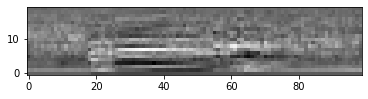

In [19]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 10507

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y[idx])], 
            filenames[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='Greys', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y[idx])])
playsound(path)

In [20]:
# Save features
np.savez(feature_sets_file, x = x, y = y, words = words)

In [21]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x', 'y', 'words']

In [22]:
len(feature_sets['x'])

70608

In [23]:
print(feature_sets['y'])

[ 0.  0.  0. ... 19. 19. 19.]


In [24]:
print(feature_sets['x'][0])

[[ 10.60838347  10.67187617  10.27037735 ...  10.42865294  10.49859504
   10.72452345]
 [-30.76168812 -27.53376051 -28.32231204 ... -28.45657021 -31.89412653
  -28.06805907]
 [ -4.91918082  -4.67494869  -5.71977178 ...  -6.3436939  -11.00595456
   -9.15247697]
 ...
 [  7.39665397   2.65092549   3.39065159 ...   1.20334716  -1.07927082
    9.77595969]
 [  0.69996869   1.50368037   0.40396903 ...   3.01665831   0.25482707
    2.9074132 ]
 [  4.04169069   4.12694614   1.50841457 ...   1.73573758   5.60995346
    3.14835211]]
